In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import math

In [2]:
# Load and preprocess the data
def load_google_stock_data(csv_path):
    data = pd.read_csv(csv_path, skiprows=2)
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

google_data = load_google_stock_data('Google_last_20_years.csv')

# Extract 'Close' prices and scale the data
dataset = google_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create sliding windows
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window_size)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 2.7660e-04 - val_loss: 0.0010
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 2.7670e-04 - val_loss: 0.0012
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 2.1264e-04 - val_loss: 7.3892e-04
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 2.0834e-04 - val_loss: 0.0024
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 1.7811e-04 - val_loss: 0.0015
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 1.7825e-04 - val_loss: 7.3608e-04
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 1.9980e-04 - val_loss: 7.5115e-04
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 1.5362e-04 - val_loss: 7.4394e-04
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 1.4723e-04 - val_loss: 5.9739e-04
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 1

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step


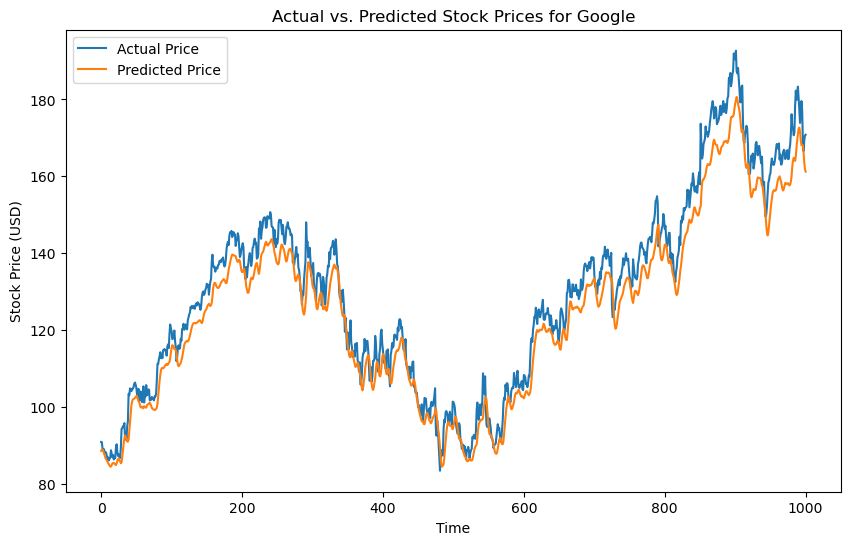

RMSE: 6.147194089362078


In [3]:
# Predict and inverse transform predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')  # Label for x-axis (Time)
plt.ylabel('Stock Price (USD)')  # Label for y-axis (Stock Price)
plt.title('Actual vs. Predicted Stock Prices for Google') 
plt.legend()
plt.show()

print(f"RMSE: {rmse}")


In [4]:
last_window = scaled_data[-window_size:]
forecast_google = []
for _ in range(30):
    next_pred = model.predict(last_window.reshape(1, window_size, 1))
    forecast_google.append(scaler.inverse_transform(next_pred)[0, 0])
    last_window = np.append(last_window[1:], next_pred)

print("Next 30 days' forecast for GOOGLE:", forecast_google)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103m

In [6]:
# Load and preprocess the data
def load_tesla_stock_data(csv_path):
    data = pd.read_csv(csv_path, skiprows=2)
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

tesla_data = load_tesla_stock_data('Tesla_last_20_years.csv')

# Extract 'Close' prices and scale the data
dataset = tesla_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create sliding windows
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window_size)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 9.5210e-04 - val_loss: 0.0024
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 7.7752e-04 - val_loss: 0.0021
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 5.5609e-04 - val_loss: 0.0021
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 7.0872e-04 - val_loss: 0.0025
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 7.5349e-04 - val_loss: 0.0039
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 6.3186e-04 - val_loss: 0.0017
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 7.0575e-04 - val_loss: 0.0016
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 6.3858e-04 - val_loss: 0.0024
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 6.0758e-04 - val_loss: 0.0019
Epoch 12/50
90/90 ━━━━━━━

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step


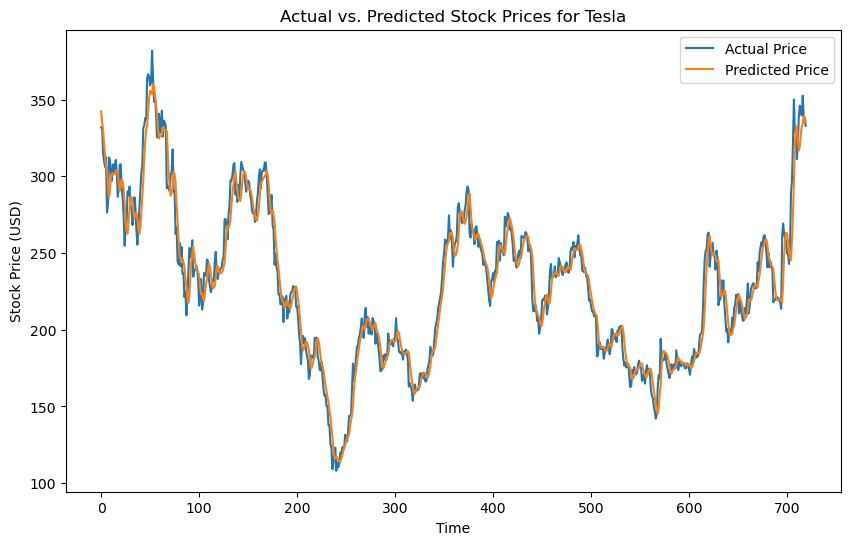

RMSE: 11.225038945788526


In [8]:
# Predict and inverse transform predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')  # Label for x-axis (Time)
plt.ylabel('Stock Price (USD)')  # Label for y-axis (Stock Price)
plt.title('Actual vs. Predicted Stock Prices for Tesla') 
plt.legend()
plt.show()

print(f"RMSE: {rmse}")



In [9]:
last_window = scaled_data[-window_size:]
forecast_tesla = []

for _ in range(30):
    next_pred = model.predict(last_window.reshape(1, window_size, 1))
    forecast_tesla.append(scaler.inverse_transform(next_pred)[0, 0])
    last_window = np.append(last_window[1:], next_pred)

print("Next 5 days' forecast for TESLA:", forecast_tesla)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14

In [10]:
# Load and preprocess the data
def load_amazon_stock_data(csv_path):
    data = pd.read_csv(csv_path, skiprows=2)
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

amazon_data = load_amazon_stock_data('AMZN_last_20_years.csv')

# Extract 'Close' prices and scale the data
dataset = amazon_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create sliding windows
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window_size)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 5.0221e-04 - val_loss: 0.0033
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 5.7786e-04 - val_loss: 0.0012
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 4.9688e-04 - val_loss: 0.0014
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - loss: 4.5156e-04 - val_loss: 9.3539e-04
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 3.6529e-04 - val_loss: 0.0012
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 4.3086e-04 - val_loss: 0.0010
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 4.3490e-04 - val_loss: 0.0015
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 3.9626e-04 - val_loss: 7.9104e-04
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 3.5119e-04 - val_loss: 0.0017
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 3.5954e-04 - val_l

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step


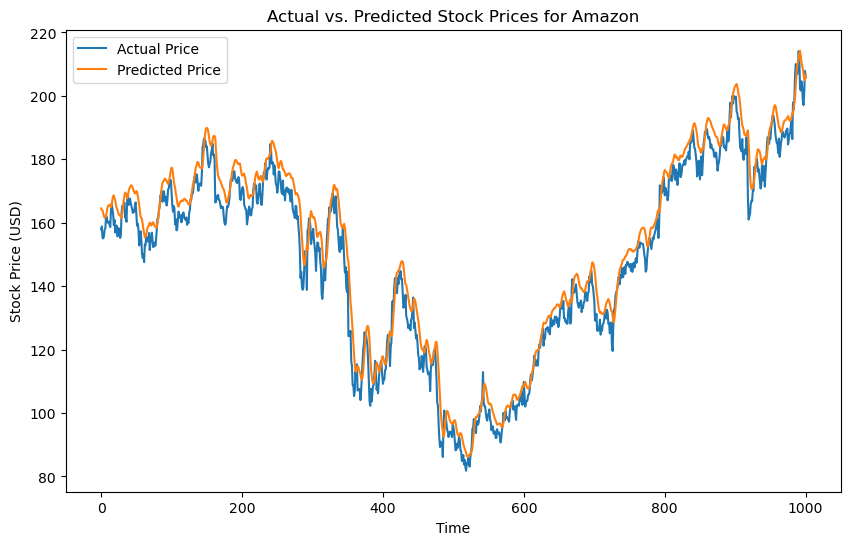

RMSE: 6.355145504014647


In [11]:
# Predict and inverse transform predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')  # Label for x-axis (Time)
plt.ylabel('Stock Price (USD)')  # Label for y-axis (Stock Price)
plt.title('Actual vs. Predicted Stock Prices for Amazon') 
plt.legend()
plt.show()

print(f"RMSE: {rmse}")

In [12]:
last_window = scaled_data[-window_size:]
forecast_amazon = []
for _ in range(30):
    next_pred = model.predict(last_window.reshape(1, window_size, 1))
    forecast_amazon.append(scaler.inverse_transform(next_pred)[0, 0])
    last_window = np.append(last_window[1:], next_pred)

print("Next 30 days' forecast for AMAZON:", forecast_amazon)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
# Load and preprocess the data
def load_apple_stock_data(csv_path):
    data = pd.read_csv(csv_path, skiprows=2)
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

apple_data = load_apple_stock_data('AAPL_last_20_years.csv')

# Extract 'Close' prices and scale the data
dataset = apple_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create sliding windows
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window_size)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 2.0990e-04 - val_loss: 7.1981e-04
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 1.7374e-04 - val_loss: 8.1388e-04
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 2.1349e-04 - val_loss: 0.0019
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 1.6870e-04 - val_loss: 0.0033
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 2.1824e-04 - val_loss: 5.8824e-04
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - loss: 1.4929e-04 - val_loss: 0.0025
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 1.5667e-04 - val_loss: 0.0037
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 1.7111e-04 - val_loss: 5.2144e-04
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 1.3737e-04 - val_loss: 8.1538e-04
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 1.307

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step


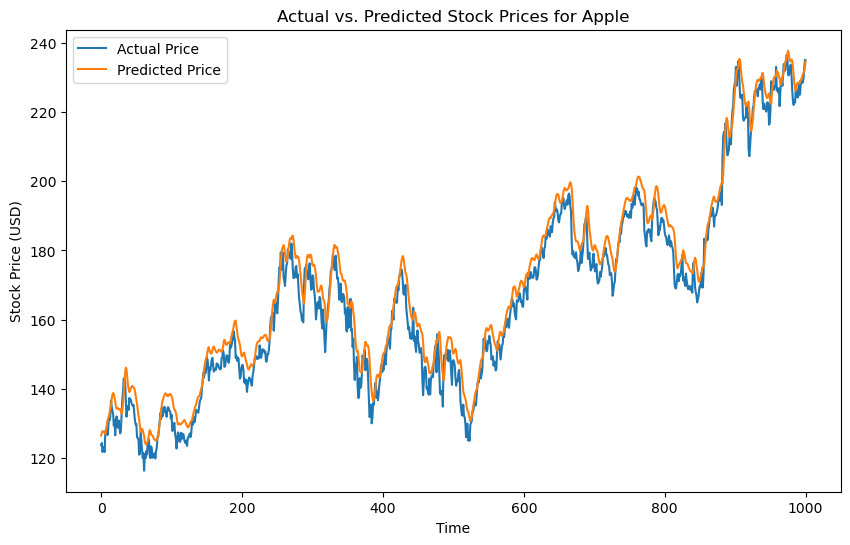

RMSE: 5.5171366631437255


In [14]:
# Predict and inverse transform predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')  # Label for x-axis (Time)
plt.ylabel('Stock Price (USD)')  # Label for y-axis (Stock Price)
plt.title('Actual vs. Predicted Stock Prices for Apple') 
plt.legend()
plt.show()

print(f"RMSE: {rmse}")

In [15]:
last_window = scaled_data[-window_size:]
forecast_apple = []
for _ in range(30):
    next_pred = model.predict(last_window.reshape(1, window_size, 1))
    forecast_apple.append(scaler.inverse_transform(next_pred)[0, 0])
    last_window = np.append(last_window[1:], next_pred)

print("Next 30 days' forecast for APPLE:", forecast_apple)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [17]:
# Load and preprocess the data
def load_microsoft_stock_data(csv_path):
    data = pd.read_csv(csv_path, skiprows=2)
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

microsoft_data = load_microsoft_stock_data('Microsoft_last_20_years.csv')

# Extract 'Close' prices and scale the data
dataset = microsoft_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create sliding windows
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window_size)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - loss: 0.0027 - val_loss: 9.6613e-04
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - loss: 2.0936e-04 - val_loss: 0.0021
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 2.0232e-04 - val_loss: 5.8524e-04
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 1.4255e-04 - val_loss: 0.0045
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 1.5999e-04 - val_loss: 0.0031
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 1.3188e-04 - val_loss: 7.9001e-04
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 1.4527e-04 - val_loss: 9.1300e-04
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 1.3364e-04 - val_loss: 8.7022e-04
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 1.3639e-04 - val_loss: 0.0042
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 1.0988e-04 - val_loss: 0.0040
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 1.3

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step


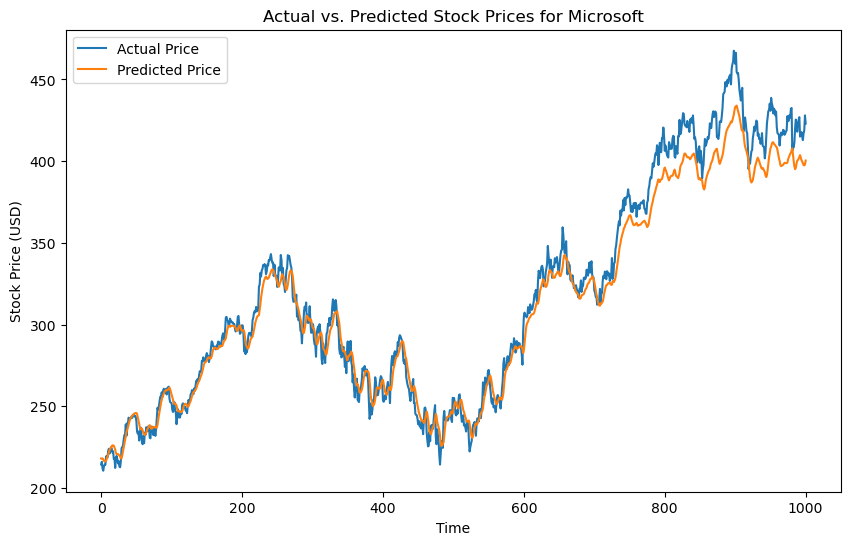

RMSE: 12.11671459703946


In [19]:
# Predict and inverse transform predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')  # Label for x-axis (Time)
plt.ylabel('Stock Price (USD)')  # Label for y-axis (Stock Price)
plt.title('Actual vs. Predicted Stock Prices for Microsoft') 
plt.legend()
plt.show()

print(f"RMSE: {rmse}")

In [20]:
last_window = scaled_data[-window_size:]
forecast_microsoft = []
for _ in range(30):
    next_pred = model.predict(last_window.reshape(1, window_size, 1))
    forecast_microsoft.append(scaler.inverse_transform(next_pred)[0, 0])
    last_window = np.append(last_window[1:], next_pred)

print("Next 30 days' forecast for MICROSOFT:", forecast_microsoft)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [21]:
forecast_microsoft

[401.68985,
 398.33685,
 393.86096,
 389.09497,
 384.46912,
 380.1323,
 376.11725,
 372.40652,
 368.96564,
 365.75647,
 362.74472,
 359.9024,
 357.20493,
 354.63422,
 352.176,
 349.81924,
 347.55573,
 345.37915,
 343.28412,
 341.26562,
 339.32016,
 337.44406,
 335.6348,
 333.88882,
 332.20343,
 330.57617,
 329.00458,
 327.48608,
 326.01862,
 324.59998]

In [23]:
from datetime import datetime, timedelta
import pandas as pd


# Find the maximum length among all forecast lists
max_length = max(len(forecast_google), len(forecast_amazon), len(forecast_apple), len(forecast_microsoft), len(forecast_tesla))

# Pad shorter lists with None or NaN to make them the same length
forecast_google += [None] * (max_length - len(forecast_google))
forecast_amazon += [None] * (max_length - len(forecast_amazon))
forecast_apple += [None] * (max_length - len(forecast_apple))
forecast_microsoft += [None] * (max_length - len(forecast_microsoft))
forecast_tesla += [None] * (max_length - len(forecast_tesla))

# Generate weekday dates starting from Nov 29, 2024
start_date = datetime(2024, 11, 29)
dates = []
current_date = start_date

while len(dates) < max_length:
    if current_date.weekday() < 5:  # Weekday check (Monday to Friday)
        dates.append(current_date.strftime('%Y-%m-%d'))
    current_date += timedelta(days=1)

# Create a DataFrame with each list as a column and the Date column
df = pd.DataFrame({
    'Date': dates,
    'Google': forecast_google,
    'Amazon': forecast_amazon,
    'Apple': forecast_apple,
    'Microsoft': forecast_microsoft,
    'Tesla': forecast_tesla
})

# Display the DataFrame
print(df)


          Date      Google      Amazon       Apple   Microsoft       Tesla
0   2024-11-29  161.319244  208.116928  236.075775  401.689850  331.337982
1   2024-12-02  159.493378  209.704346  237.245697  398.336853  327.745117
2   2024-12-03  156.960938  211.267929  238.314240  393.860962  324.436310
3   2024-12-04  154.145432  212.779678  239.319992  389.094971  321.427612
4   2024-12-05  151.276428  214.232117  240.283630  384.469116  318.708191
5   2024-12-06  148.464722  215.628204  241.215118  380.132294  316.251709
6   2024-12-09  145.757065  216.973801  242.119034  376.117249  314.025543
7   2024-12-10  143.167877  218.274780  242.997620  372.406525  311.984680
8   2024-12-11  140.696411  219.536194  243.851547  368.965637  310.086609
9   2024-12-12  138.335815  220.762024  244.681137  365.756470  308.293854
10  2024-12-13  136.077332  221.955170  245.486572  362.744720  306.574860
11  2024-12-16  133.912064  223.117584  246.268188  359.902405  304.904541
12  2024-12-17  131.83198

In [24]:
df.to_csv('predicted_stocks.csv')